In [10]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))  # Go up one directory

from llm_provider import LLM_provider
llm=LLM_provider()


In [ ]:
embedding = llm.embed_query("Hello")

In [3]:
embedding

[-0.038135871291160583,
 -0.021921640262007713,
 -0.0016345970798283815,
 -0.005634445231407881,
 -0.003958298824727535,
 0.008066579699516296,
 0.002837490290403366,
 0.03644958883523941,
 0.010733820497989655,
 0.04588627070188522,
 0.0016427042428404093,
 -0.024418631568551064,
 -0.03794129937887192,
 0.016749300062656403,
 -0.026656195521354675,
 0.02302420698106289,
 0.02102985605597496,
 0.003362426068633795,
 0.005484463647007942,
 -0.008625970222055912,
 0.01563051901757717,
 0.0035934788174927235,
 -0.007661223877221346,
 0.04108686000108719,
 0.00854489952325821,
 0.02088392898440361,
 -0.045075561851263046,
 -0.008723256178200245,
 -0.028293833136558533,
 -0.012322815135121346,
 -0.0021645997185260057,
 0.020624501630663872,
 0.009331289678812027,
 0.014211772941052914,
 0.03991943597793579,
 0.00997175183147192,
 0.018613936379551888,
 0.002592250006273389,
 -0.01809508167207241,
 0.022780993953347206,
 0.017754582688212395,
 0.015662945806980133,
 -0.014706307090818882,
 0

In [2]:
from langchain_community.document_loaders import TextLoader,DirectoryLoader,PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter 

In [3]:
# loader=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)
file_path="../docs//BRD.pdf"
loader = PyPDFLoader(file_path)

In [4]:
docs=loader.load()
docs

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-09-10T01:48:55-07:00', 'author': 'python-docx', 'moddate': '2025-09-10T01:48:55-07:00', 'source': '../docs//BRD.pdf', 'total_pages': 12, 'page': 0, 'page_label': '1'}, page_content="Business Requirements Document (BRD) – Savings Account Opening \nProduct: Savings Account | Region: India | Created on: 3 Sept 2025 \n \n1. Introduction \nThis document specifies the business requirements for a fully digital, Agentic AI–enabled \nSavings Account opening journey. The objective is to capture, validate, and process \ncustomer information with high data quality, seamless user experience, and compliance \nwith KYC/AML and bank policies. \n2. Scope \nIn Scope: \n• End-to-end digital onboarding flow for Savings Account applicants \n• Field-level validations, real-time error handling, and exception workflow \n• Agentic AI assistance for data extraction, auto-fill, and proactive checks \n• Document capture, O

In [5]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=200,chunk_overlap=100)


In [6]:
new_docs=text_splitter.split_documents(documents=docs)
new_docs

[Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-09-10T01:48:55-07:00', 'author': 'python-docx', 'moddate': '2025-09-10T01:48:55-07:00', 'source': '../docs//BRD.pdf', 'total_pages': 12, 'page': 0, 'page_label': '1'}, page_content='Business Requirements Document (BRD) – Savings Account Opening \nProduct: Savings Account | Region: India | Created on: 3 Sept 2025 \n \n1. Introduction'),
 Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-09-10T01:48:55-07:00', 'author': 'python-docx', 'moddate': '2025-09-10T01:48:55-07:00', 'source': '../docs//BRD.pdf', 'total_pages': 12, 'page': 0, 'page_label': '1'}, page_content='Product: Savings Account | Region: India | Created on: 3 Sept 2025 \n \n1. Introduction \nThis document specifies the business requirements for a fully digital, Agentic AI–enabled'),
 Document(metadata={'producer': 'PyPDF', 'creator': 'Microsoft Word', 'creationdate': '2025-09-10T01:48:55-07:00'

In [7]:
doc_string=[docs.page_content for docs in new_docs]
doc_string

['Business Requirements Document (BRD) – Savings Account Opening \nProduct: Savings Account | Region: India | Created on: 3 Sept 2025 \n \n1. Introduction',
 'Product: Savings Account | Region: India | Created on: 3 Sept 2025 \n \n1. Introduction \nThis document specifies the business requirements for a fully digital, Agentic AI–enabled',
 'This document specifies the business requirements for a fully digital, Agentic AI–enabled \nSavings Account opening journey. The objective is to capture, validate, and process',
 'Savings Account opening journey. The objective is to capture, validate, and process \ncustomer information with high data quality, seamless user experience, and compliance',
 'customer information with high data quality, seamless user experience, and compliance \nwith KYC/AML and bank policies. \n2. Scope \nIn Scope:',
 'with KYC/AML and bank policies. \n2. Scope \nIn Scope: \n• End-to-end digital onboarding flow for Savings Account applicants \n• Field-level validations, 

In [8]:
len(doc_string)

240

In [11]:
def format_docs(docs):
    """Format retrieved documents into a single string"""
    return "\n\n".join([doc.page_content for doc in docs])

In [12]:
from langchain_chroma import Chroma

In [13]:
embedding_model=llm.get_embedding_model()
db=Chroma.from_documents(new_docs,embedding_model)

In [14]:
retreiver=db.as_retriever(search_kwargs={"k":10})

In [15]:
retreiver.invoke("Give me informration relted to cybercrime")

[Document(id='61b5ed60-625d-4635-94e7-f026421cb98a', metadata={'page': 2, 'page_label': '3', 'creationdate': '2025-09-10T01:48:55-07:00', 'moddate': '2025-09-10T01:48:55-07:00', 'author': 'python-docx', 'source': '../docs//BRD.pdf', 'creator': 'Microsoft Word', 'total_pages': 12, 'producer': 'PyPDF'}, page_content='The pin code of current address should be checked for cybercrime hotspots - Individual cust ids \nwith mentioned 3457 pin codes identified as Cyber hotspots in communication (mailing) address'),
 Document(id='15188fb0-1f23-401d-92cb-b7d74824b144', metadata={'creator': 'Microsoft Word', 'producer': 'PyPDF', 'total_pages': 12, 'moddate': '2025-09-10T01:48:55-07:00', 'page_label': '3', 'creationdate': '2025-09-10T01:48:55-07:00', 'author': 'python-docx', 'page': 2, 'source': '../docs//BRD.pdf'}, page_content='from CBS. \nThe pin code of current address should be checked for cybercrime hotspots - Individual cust ids'),
 Document(id='3ee86a73-0e01-4e48-9d04-52c5567c94eb', metadat

In [16]:
from pydantic import BaseModel,Field

In [17]:
class TopicSelector(BaseModel):
    Topic:str=Field(description="selected topic")
    Resoaning:str=Field(description="Reason behind the topic selection")

In [18]:
from langchain.output_parsers import PydanticOutputParser

In [19]:
parser=PydanticOutputParser(pydantic_object=TopicSelector)

In [20]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Resoaning": {"description": "Reason behind the topic selection", "title": "Resoaning", "type": "string"}}, "required": ["Topic", "Resoaning"]}\n```'

In [ ]:
'''The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema 
{
    "properties": 
        {"foo": {
        "title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}
        }
    }, 
    "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]
} 
is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n
{
    "properties": {
        "Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, 
        "Resoaning": {"description": "Reason behind the topic selection", "title": "Resoaning", "type": "string"}
    }, 
    "required": ["Topic", "Resoaning"]
}\n```
'''

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Resoaning": {"description": "Reason behind the topic selection", "title": "Resoaning", "type": "string"}}, "required": ["Topic", "Resoaning"]}\n```'

In [22]:
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage
import operator

In [23]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [24]:
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import (
    RunnablePassthrough
)

In [25]:
def function_1(state:AgentState):
    question=state["messages"][0]
    print("Question",question)
    template="""
    Your task is to classify the given user query into one of the following categories:[Banking Info,Not Related],
    Only Respond with category name and nothing else.
    User query:{question}
    {format_instructions}
    """
    prompt=PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )
    chain = prompt | llm.get_llm() | parser
    response=chain.invoke({"question":question})
    print("Parsed response is : ",response)
    return {"messages":[response.Topic]}

In [26]:
state={"messages":["Aadhar card details for accout opening"]}
function_1(state)


Question Aadhar card details for accout opening
Parsed response is :  Topic='Banking Info' Resoaning='The query is related to the details required for opening a bank account, which falls under the category of banking information.'


{'messages': ['Banking Info']}

In [27]:
def router(state:AgentState):
    print("-> Router <-")
    last_message=state["messages"][-1]
    print("last message in the state is : ",last_message)
    if "banking info" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [28]:
def function_2(state:AgentState):
    print("-> RAG Function Call <-")
    question=state["messages"][0]

    template="""You are an assitant for question answering tasks. Use the following pieces of retreived contexts to
    answer the question.If you dont know the answer , jsut say that you dont know. Use three sentences maximum and keep
    the answer concise. \n Question :{question} \n Context :{context}  
    """
    prompt=PromptTemplate(
        template=template,
        input_variables=["context","question"]
    )
    chain = {"context":retreiver|format_docs ,"question":RunnablePassthrough()}|prompt|llm.get_llm()
    result=chain.invoke(question)
    return {"messages":[result.content]}


In [29]:
def function_3(state:AgentState):
    print("-> LLM Function Call <-")
    question=state["messages"][0]
    model=llm.get_llm()
    response=model.invoke(question)
    return {"messages":[response.content]}

In [30]:
from langgraph.graph import StateGraph,END


In [31]:
workflow=StateGraph(AgentState)

In [32]:
workflow.add_node("Supervisor",function_1)


In [33]:
workflow.add_node("RAG",function_2)

In [34]:
workflow.add_node("LLM",function_3)

In [35]:
workflow.set_entry_point("Supervisor")

In [36]:
workflow.add_conditional_edges(
    "Supervisor",
    router,{
        "RAG Call":"RAG",
        "LLM Call":"LLM"
    })

In [37]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

In [38]:
app=workflow.compile()

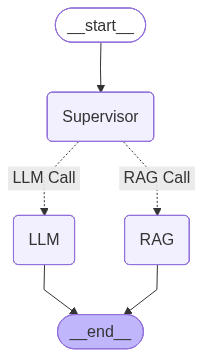

In [39]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png(max_retries=5,retry_delay=2)))

In [40]:
app.invoke({"messages":["Extract all the business rules related to account opening.It measn that give information which can be asked to customer to onboard"]})

Question Extract all the business rules related to account opening.It measn that give information which can be asked to customer to onboard
Parsed response is :  Topic='Banking Info' Resoaning='The query is related to extracting business rules for account opening, which falls under banking information.'
-> Router <-
last message in the state is :  Banking Info
-> RAG Function Call <-


{'messages': ['Extract all the business rules related to account opening.It measn that give information which can be asked to customer to onboard',
  'Banking Info',
  'The business rules related to account opening include:  \n1. Capturing and validating customer information such as Name, Date of Birth (DOB), mobile number, and email ID.  \n2. Verifying the activity, purpose of account opening, expected account turnover, and occupation details (including subcategories, if applicable).  \n3. Ensuring compliance with KYC/AML regulations, bank policies, and supporting real-time validations, error handling, and audit trails.  ']}

## Assignment 4

**Task: Create a Multi-Node System with the following components:**

1. **Create one supervisor node**

2. **Create one router function**

3. **Create three additional nodes:**
   - 3.1 **LLM call (llm node)**
   - 3.2 **RAG (rag node)**
   - 3.3 **Web crawler (fetch information in real-time from the internet)**

4. **Create one additional node for validation of the generated output** → explore how to implement the validation part

5. **If validation fails, return to the supervisor node, and then the supervisor node will decide what needs to be called next**

6. **Only generate the final output once the validation passes**

In [161]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [ ]:
def advnace_supervisor():
    print("Inside Advance Supervisor")
    question=state["messages"][0]
    last_message=state["messages"][-1] if len(state["messages"]) > 1 else ""

    if "FAIL" in last_message:
        print("Previous attempt failed, checking history...")

        previous_decisions=[]
        for i in range(1,len(state["messages"],3)):
            if i < len(state["messages"]):
                previous_decisions.append(state["messages"][i].lower())
        print(f"Previously tried: {previous_decisions}")

        all_methods = ["web crawling", "banking info", "not related"]
        for method in all_methods:
            if method not in previous_decisions:
                return {"messages":[method.title()]}
    
        return {"messages":["Not Related"]}
    

    template="""Your task is to classify the given user query into one of the following categories:[banking info,web crawling,not related],
    Only Respond with category name and nothing else.
    User query:{question}
    {format_instructions}"""

    prompt=PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )
    chain=prompt | llm.get_llm() | parser
    response=chain.invoke({"question":question})
    return {"messages":[response.Topic]}
    

In [ ]:
def supervisor_func(state:AgentState):
    print("Inside Supervisor")
    question=state["messages"][0]
    template="""Your task is to classify the given user query into one of the following categories:[banking info,web crawling,not related],
    Only Respond with category name and nothing else.
    User query:{question}
    {format_instructions}"""

    prompt=PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )
    chain=prompt | llm.get_llm() | parser
    response=chain.invoke({"question":question})
    return {"messages":[response.Topic]}

In [163]:
def router_func(state:AgentState):
    print("Inside router")
    message=state["messages"][-1]
    print("The message received to router is ",message)
    if message.lower()=="banking info":
        return "RAG Call"
    elif message.lower()=="web crawling":
        return "WEB Call"
    else:
        return "LLM Call"

In [164]:
def rag_func(state:AgentState):
    print("Inside RAG")
    question=state["messages"][0]
    template="""You are an assitant for question answering tasks. Use the following pieces of retreived contexts to
    answer the question.If you dont know the answer , jsut say that you dont know. Use three sentences maximum and keep
    the answer concise. \n Question :{question} \n Context :{context}  
    """
    prompt=PromptTemplate(
        template=template,
        input_variables=["context","question"]
    )
    chain={"context":retreiver|format_docs,"question":question}|prompt|llm.get_llm()
    response=chain.invoke(question)
    return {"messages":[response.content]}

In [165]:
def llm_func(state:AgentState):
    print("Inside LLM")
    question=state["messages"][0]
    chain=llm.get_llm()
    response=chain.invoke(question)
    return {"messages":[response.content]}
    

In [166]:
from langchain_community.tools import DuckDuckGoSearchRun
def web_func(state:AgentState):
    print("Inside WEB Crawler")
    search=DuckDuckGoSearchRun()
    question=state["messages"][0]
    try:
        response=search.invoke(question)
        print(f"Web search response: {response[:200]}...")  # Print first 200 chars
        return {"messages":[response]}
    except Exception as e:
        print(f"Web search error: {e}")
        return {"messages":[f"Web search failed: {str(e)}"]}

In [167]:
class ValidationResult(BaseModel):
    status:str=Field(description="PASS or FAIL")

validation_parser=PydanticOutputParser(pydantic_object=ValidationResult)

In [168]:
def validator_func(state:AgentState):
    print("Inside Validator function")
    question=state["messages"][0]
    message=state["messages"][-1]
    
    print("question inside the validator func is ",question)
    print("message inside the validator func is ",message)
    template="""Evaluate this response to the user's question:

    Question: {question}
    Response: {message}

    Does this response somewhat answer the user's question?
    If the answer is vague or doesn't address the question, respond FAIL.
    If the answer somewhat addresses the question, respond PASS.

  {format_instructions}"""
    prompt=PromptTemplate(
        template=template,
        input_variables=["question","message"],
        partial_variables={"format_instructions":validation_parser.get_format_instructions()}
    )
    chain=prompt|llm.get_llm()|validation_parser
    response=chain.invoke({"question":question,"message":message})
    return {"messages":[response.status]}


In [169]:
def validator_router_func(state: AgentState):
    print("Inside Validator Router")
    validation_result = state["messages"][-1]
    print("The message received to validator router is ",validation_result)
    if "PASS" in validation_result:
        return "validated"
    else:
        return "continue"

In [170]:
workflow_new=StateGraph(AgentState)

In [171]:
workflow_new.add_node("Supervisor",supervisor_func)

In [172]:
workflow_new.add_node("RAG",rag_func)

In [173]:
workflow_new.add_node("LLM",llm_func)

In [174]:
workflow_new.add_node("WEB",web_func)

In [175]:
workflow_new.set_entry_point("Supervisor")

In [176]:
workflow_new.add_conditional_edges(
    "Supervisor",
    router_func,{
        "RAG Call":"RAG",
        "LLM Call":"LLM",
        "WEB Call":"WEB"
    }
)

In [177]:
workflow_new.add_node("Validator",validator_func)

In [178]:
workflow_new.add_edge("RAG","Validator")

In [179]:
workflow_new.add_edge("LLM","Validator")

In [180]:
workflow_new.add_edge("WEB","Validator")

In [181]:
workflow_new.add_conditional_edges(
    "Validator",
    validator_router_func,{
        "continue":"Supervisor",
        "validated":END
    }
)

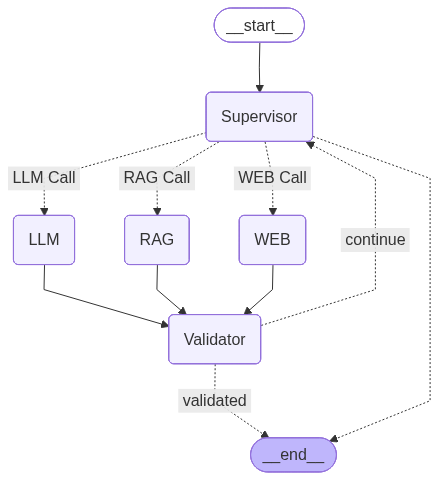

In [182]:
app_new=workflow_new.compile()
from IPython.display import Image,display
display(Image(app_new.get_graph().draw_mermaid_png(max_retries=5,retry_delay=2)))


In [183]:
app_new.invoke({"messages":["Please search the web to find the premium cheese brand founded in India"]})

Inside Supervisor
Inside router
The message received to router is  web crawling
Inside WEB Crawler
Web search response: Jul 7, 2025 · India 's Premier Artisanal Cheese & Butter Brand . Crafting Award-Winning Artisanal Cheeses in India with the Finest Indigenous Ingredients. Oct 3, 2024 · Based in Kashmir, Himalayan Che...
Inside Validator function
question inside the validator func is  Please search the web to find the premium cheese brand founded in India
message inside the validator func is  Jul 7, 2025 · India 's Premier Artisanal Cheese & Butter Brand . Crafting Award-Winning Artisanal Cheeses in India with the Finest Indigenous Ingredients. Oct 3, 2024 · Based in Kashmir, Himalayan Cheese was founded by Dutch entrepreneur Chris Zandee. With fresh mountain milk, lip-smacking delights of Gouda, Cheddar, Mozzarella, Kalari and the likes are the top-notch creations of Himalayan Artisan Cheese . Passion Cheese, a Premium Gourmet Cheese brand with about 20 varieties of cheese manufactur

{'messages': ['Please search the web to find the premium cheese brand founded in India',
  'web crawling',
  "Jul 7, 2025 · India 's Premier Artisanal Cheese & Butter Brand . Crafting Award-Winning Artisanal Cheeses in India with the Finest Indigenous Ingredients. Oct 3, 2024 · Based in Kashmir, Himalayan Cheese was founded by Dutch entrepreneur Chris Zandee. With fresh mountain milk, lip-smacking delights of Gouda, Cheddar, Mozzarella, Kalari and the likes are the top-notch creations of Himalayan Artisan Cheese . Passion Cheese, a Premium Gourmet Cheese brand with about 20 varieties of cheese manufactured and supplied Pan- India . Aug 26, 2022 · Let’s examine some of the top cheese brands that are now on the Indian market. 1. Amul – No.1 Cheese Brand in India . Amul is the first name on the list because it is regarded as the best brand in India for producing milk products. In this industry, it enjoys some level of international fame. Founded by Shruti Golchha and Manu Chandra in 2018,